<a href="https://colab.research.google.com/github/RaicLee/Jpub_AI22/blob/master/Chapter4-2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

정책 경사법 </br>
(1) 세타 준비</br>
(2) 파라미터 세타를 정책으로 변환 </br>
(3) 정책에 따라 골인지점에 이를 때까지 행동 반복</br>
(4) 성공한 행동을 많이 하도록 파라미터 세타를 변경 </br>
(5) 정책 변화량이 임계값 이하가 될때까지 (2)~(4) 반복 </br>



In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import animation
from IPython.display import HTML


In [0]:
def drawwall(lis1,lis2):
  plt.plot(lis1,lis2,color='k')

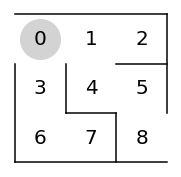

In [3]:
#maze
fig=plt.figure(figsize=(3,3))

#wall
drawwall([0,3],[3,3])
drawwall([0,3],[0,0])
drawwall([0,0],[0,2])
drawwall([3,3],[1,3])
drawwall([1,1],[1,2])
drawwall([2,3],[2,2])
drawwall([2,1],[1,1])
drawwall([2,2],[0,1])


for i in range(3):
  for j in range(3):
    plt.text(0.5+i,2.5-j,str(i+j*3),size=20,ha='center',va='center')

circle,=plt.plot([0.5],[2.5],marker='o',color='#d3d3d3',markersize=40)

plt.tick_params(axis='both',which='both',bottom=False,top=False,labelbottom=False,right=False,left=False,labelleft=False)
plt.box(False)





In [0]:
theta_0=np.array([
                  [np.nan,1,1,np.nan],#0#top right down left
                  [np.nan,1,1,1],#1
                  [np.nan,np.nan,np.nan,1],#2
                  [1,np.nan,1,np.nan],#3
                  [1,1,np.nan,np.nan],#4
                  [np.nan,np.nan,1,1],#5
                  [1,1,np.nan,np.nan],#6
                  [np.nan,np.nan,np.nan,1]#7
])

In [0]:
def get_pi(theta):
  [m,n]=theta.shape
  pi=np.zeros((m,n))

  exp_theta=np.exp(theta)

  for i in range(0,m):
    pi[i,:]= exp_theta[i,:]/np.nansum(exp_theta[i,:])
  pi=np.nan_to_num(pi)
  return pi

In [6]:
pi_0=get_pi(theta_0)
print(pi_0)

[[0.         0.5        0.5        0.        ]
 [0.         0.33333333 0.33333333 0.33333333]
 [0.         0.         0.         1.        ]
 [0.5        0.         0.5        0.        ]
 [0.5        0.5        0.         0.        ]
 [0.         0.         0.5        0.5       ]
 [0.5        0.5        0.         0.        ]
 [0.         0.         0.         1.        ]]


In [0]:

#정책의 확률에 따라 행동 변환
#정책에 따라 행동 얻기
def get_a(pi,s):
  return np.random.choice([0,1,2,3],p=pi[s])

#행동에 따라 다음 상태 얻기
def get_s_next(s,a):
  if a==0:#상
    return s-3
  elif a==1:#우
    return s+1
  elif a==2:#하
    return s+3
  elif a==3:#좌
    return s-1

In [0]:
def play(pi):
  state=0
  state_action_history=[[0,np.nan]]

  while True:
    action=get_a(pi,state)
    state_next=get_s_next(state,action)
    state_action_history[-1][1]=action
    state_action_history.append([state_next,np.nan])

    if state_next==8:
      break
    else:
      state=state_next

  return state_action_history

  

In [9]:
s_a_history=play(pi_0)
print(s_a_history)
print('1 episode step count: {}'.format(len(s_a_history)+1))

[[0, 2], [3, 0], [0, 1], [1, 1], [2, 3], [1, 2], [4, 1], [5, 3], [4, 0], [1, 1], [2, 3], [1, 2], [4, 1], [5, 3], [4, 0], [1, 2], [4, 1], [5, 2], [8, nan]]
1 episode step count: 20


In [0]:
def update_theta(theta,pi,s_a_history):
  eta=0.1
  total=len(s_a_history)-1
  [s_count,a_count]=theta.shape
  d_theta=theta.copy()
  for i in range(0,s_count):
    for j in range(0,a_count):
      if not(np.isnan(theta[i,j])):
        sa_ij=[sa for sa in s_a_history if sa==[i,j]]
        n_ij=len(sa_ij)

        sa_i=[sa for sa in s_a_history if sa[0]==i]
        n_i=len(sa_i)

        d_theta[i,j]=(n_ij-pi[i,j]*n_i)/total

  return theta+eta*d_theta


In [11]:
stop_epsilon=10**-4
theta=theta_0
pi=pi_0

for episode in range(10000):
  s_a_history=play(pi)

  theta=update_theta(theta,pi,s_a_history)

  pi_new=get_pi(theta)
  pi_delta=np.sum(np.abs(pi_new-pi))
  pi=pi_new
  print('episode {} , step {} , delta {:.4f}'.format(episode,len(s_a_history)-1,pi_delta))
  if pi_delta<stop_epsilon:
    break


episode 0 , step 4 , delta 0.0487
episode 1 , step 62 , delta 0.0089
episode 2 , step 18 , delta 0.0271
episode 3 , step 14 , delta 0.0175
episode 4 , step 22 , delta 0.0245
episode 5 , step 20 , delta 0.0138
episode 6 , step 222 , delta 0.0080
episode 7 , step 126 , delta 0.0043
episode 8 , step 10 , delta 0.0196
episode 9 , step 12 , delta 0.0362
episode 10 , step 52 , delta 0.0142
episode 11 , step 24 , delta 0.0248
episode 12 , step 4 , delta 0.0476
episode 13 , step 4 , delta 0.0471
episode 14 , step 34 , delta 0.0149
episode 15 , step 28 , delta 0.0111
episode 16 , step 16 , delta 0.0174
episode 17 , step 16 , delta 0.0227
episode 18 , step 22 , delta 0.0161
episode 19 , step 16 , delta 0.0223
episode 20 , step 14 , delta 0.0143
episode 21 , step 18 , delta 0.0126
episode 22 , step 24 , delta 0.0196
episode 23 , step 32 , delta 0.0151
episode 24 , step 28 , delta 0.0182
episode 25 , step 6 , delta 0.0376
episode 26 , step 54 , delta 0.0149
episode 27 , step 12 , delta 0.0236
epis

In [12]:
def animate(i):
  state=s_a_history[i][0]
  circle.set_data((state%3)+0.5,2.5-int(state/3))
  return circle

anim=animation.FuncAnimation(fig,animate,frames=len(s_a_history),interval=200,repeat=False)
HTML(anim.to_jshtml())